<a href="https://colab.research.google.com/github/RahulJuluru2/Unit1ClassPractice/blob/main/B19KNNSession1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget https://raw.githubusercontent.com/mdhabeebvulla/samples/master/diabetes.csv

--2022-05-22 04:37:57--  https://raw.githubusercontent.com/mdhabeebvulla/samples/master/diabetes.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23873 (23K) [text/plain]
Saving to: ‘diabetes.csv’

diabetes.csv        100%[===================>]  23.31K  --.-KB/s    in 0.002s  

2022-05-22 04:37:57 (11.1 MB/s) - ‘diabetes.csv’ saved [23873/23873]



In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('diabetes.csv')

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.shape

(768, 9)

In [ ]:
df.Outcome.unique()

array([1, 0])

In [ ]:
x = df.iloc[:,0:7]
y = df.iloc[:,8:]

In [ ]:
# x = x.fit_transorm(x) Numpy 

In [ ]:
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction
0,6,148,72,35,0,33.6,0.627
1,1,85,66,29,0,26.6,0.351
2,8,183,64,0,0,23.3,0.672
3,1,89,66,23,94,28.1,0.167
4,0,137,40,35,168,43.1,2.288


In [ ]:
y.head()

,Outcome
0,1
1,0
2,1
3,0
4,1


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


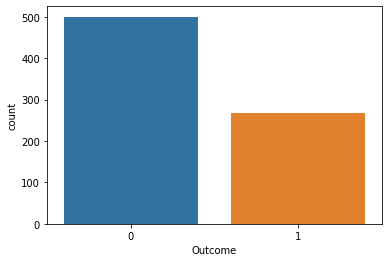

In [ ]:
sns.countplot('Outcome',data = df);

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state = 42)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
x_train

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3,p=2,metric="minkowski")

In [ ]:
knn.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=3)

In [ ]:
ypred = knn.predict(x_test)

In [ ]:
print(accuracy_score(y_test,ypred))

0.6883116883116883


In [ ]:
print(confusion_matrix(y_test,ypred))

[[91  8]
 [26 29]]


In [ ]:
for i in range(3,30):
  knn = KNeighborsClassifier(n_neighbors=i,p=2,metric="minkowski")
  knn.fit(x_train,y_train)
  ypred = knn.predict(x_test)
  print(i,accuracy_score(y_test,ypred))

In [ ]:
error1 = []
for i in range(1,40):
  knn = KNeighborsClassifier(n_neighbors=i,p=2,metric="minkowski")
  knn.fit(x_train,y_train)
  pred1 = knn.predict(x_test)
  pred1 = pred1.reshape(-1,1)
  error1.append(np.mean(pred1 != y_test))


In [ ]:
print(error1)

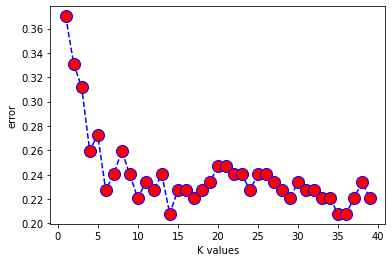

In [ ]:
plt.plot(range(1,40),error1,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=12)
plt.xlabel('K values')
plt.ylabel('error')
plt.show()